Dataset came from an mlcourse.ai course that was hosted on github

unsupervised clustering for whether hero is carry support etc.

# Introduction
##### Dota 2 (Defender of the Ancients 2)

According to Dota 2, the first time I played was in 2011. Since then I've been playing on an off and found some data which could hopefully give me some insight on what are the key factors behind winning a Dota2 match. While there are several factors that are widely known to be predictive of who wins a Dota2 match I want to see what I can uncover while learning more about the statistics in the process. 

##### What is Dota2?
(obtained from: https://en.wikipedia.org/wiki/Dota_2#:~:text=Dota%202%20is%20a%20multiplayer,expansion%20pack%2C%20The%20Frozen%20Throne)

Dota 2 is a multiplayer online battle arena (MOBA) video game in which two teams of five players compete to collectively destroy a large structure defended by the opposing team known as the "Ancient", whilst defending their own. The game is controlled using standard real-time strategy controls, and is presented on a single map in a three-dimensional isometric perspective. Ten players each control one of the game's playable characters, known as "heroes", with each having their own design, strengths, and weaknesses. Heroes are divided into two primary roles, known as the core and support.

The two teams—known as the Radiant and Dire—occupy fortified bases in opposite corners of the map, which is divided in half by a crossable river and connected by three paths, which are referred to as "lanes".[1][2] The lanes are guarded by defensive towers that attack any opposing unit who gets within its line of sight.[2] A small group of weak computer-controlled creatures called "creeps" travel predefined paths along the lanes and attempt to attack any opposing heroes, creeps, and buildings in their way.[2][6][11] Creeps periodically spawn throughout the game in groups from two buildings, called the "barracks", that exist in each lane and are located within the team's bases.[2][6][12] The map is also permanently covered for both teams in fog of war, which prevents a team from seeing the opposing team's heroes and creeps if they are not directly in sight of themselves or an allied unit. The map also features a day-night cycle, with some hero abilities and other game mechanics being altered depending on the time of the cycle.[5] Also present on the map are "neutral creeps" that are hostile to both teams, and reside in marked locations on the map known as "camps". Camps are located in the area between the lanes known as the "jungle", which both sides of the map have.[6][13]

Neutral creeps do not attack unless provoked, and respawn over time if killed. The most powerful neutral creep is named "Roshan", who is a unique boss that may be defeated by either team to obtain special items, such as one that allows a one-time resurrection if the hero that holds it is killed.[2][6][14] Roshan will respawn around ten minutes after being killed, and becomes progressively harder to kill as the match progresses over time.[14] "Runes", which are special items that spawn in set positions on the map every two minutes, offer heroes various temporary, but powerful power-ups when collected.

You can visit the wikipedia to see even more information about the game.

In [1]:
import json
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import scipy.stats as ss
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest
pd.options.mode.chained_assignment = None  # default='warn'
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

Examining the raw data.

In [2]:
pd.set_option('display.max_columns', None)
dota_df = pd.read_csv(r'C:\Users\JT\Desktop\Data Science\WIP\Dota2\dota2.csv')
dota_df.head()

,match_id_hash,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed,game_time.1,radiant_win,duration,time_remaining,next_roshan_team,Unnamed: 251
0,a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,543,7,533,358,600,350.93784,2,116,122,0.000000,0,0,1,0,0.000000,0,0,0,0,78,0,0,0,3,399,4,478,636,720,254.93774,2,124,126,0.000000,0,0,0,0,0.000000,0,0,0,0,14,0,1,0,0,304,0,130,700,700,242.93773,1,70,156,0.000000,0,0,1,0,0.000000,0,0,0,0,59,0,0,0,1,389,4,506,399,700,326.93780,2,170,86,0.000000,0,0,0,0,0.000000,0,0,0,0,77,0,0,0,0,402,10,344,422,800,314.93780,2,120,100,0.000000,0,0,0,0,0.000000,0,0,0,0,12,0,0,1,13,982,12,780,650,720,386.93787,3,82,170,0.000000,0,0,1,0,1.00,0,0,0,0,21,0,0,0,6,788,9,706,640,640,422.93790,3,174,90,0.000000,0,0,2,0,0.00,0,0,0,0,60,0,0,0,1,531,0,307,720,720,242.93773,2,180,84,0.299948,0,0,2,0,0.00,0,0,0,0,84,1,0,0,0,796,0,421,760,760,326.93780,2,90,150,0.000000,0,0,2,1,1.0,0,0,1,0,34,0,0,0,0,851,11,870,593,680,566.93805,3,128,128,0.000000,0,0,0,0,0.00,0,0,0,0,155,False,992,83

In [3]:
dota_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39675 entries, 0 to 39674
Data columns (total 252 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   match_id_hash               39675 non-null  object 
 1   game_time                   39675 non-null  int64  
 2   game_mode                   39675 non-null  int64  
 3   lobby_type                  39675 non-null  int64  
 4   objectives_len              39675 non-null  int64  
 5   chat_len                    39675 non-null  int64  
 6   r1_hero_id                  39675 non-null  int64  
 7   r1_kills                    39675 non-null  int64  
 8   r1_deaths                   39675 non-null  int64  
 9   r1_assists                  39675 non-null  int64  
 10  r1_denies                   39675 non-null  int64  
 11  r1_gold                     39675 non-null  int64  
 12  r1_lh                       39675 non-null  int64  
 13  r1_xp                       39

Wow that's a lot of columns! Many columns are "duplicated" in a sense that there's a set of features for one team (Radiant denoted with prefix "r") and identical features for the other team (Dire denoted with prefix "d"). The remaining features are descriptors for the match as the game mode, the team that took the next roshan, etc.

I'm going to clean up the format of the data and make it easier to work with and do EDA. The data is very wide and can be condensed to be better viewed on a match/team basis.

In [4]:
#dropping the empty column
dota_df.drop(['Unnamed: 251'], inplace=True, axis=1)

#I know I will not be doing any analysis with the chat
dota_df.drop(['chat_len'], inplace=True, axis=1)

For this project, I'm going to focus my analysis on ranked gameplay only (lobby_type 7).

In [5]:
ranked_df = dota_df[dota_df['lobby_type'] == 7].drop('lobby_type', axis=1)   #filter lobby type and drop since it will only have 1 unique value
ranked_df.shape

(27049, 249)

In [6]:
#list of column names that will be melted
team_cols = [x for x in ranked_df.columns if ((re.match("r\d", x) is not None) or (re.match("d\d", x)) is not None)] 

#list of columns not to be melted
non_melt_cols = [x for x in ranked_df.columns if x not in team_cols] 

#ranked_melt = pd.melt(ranked_df, id_vars=non_melt_cols, value_vars=team_cols, var_name="melted_vars")
ranked_melt = pd.melt(ranked_df, id_vars = 'match_id_hash', value_vars=team_cols, var_name="melted_vars")

#inspecting the melted dataframe
ranked_melt.head()

,match_id_hash,melted_vars,value
0,a400b8f29dece5f4d266f49f1ae2e98a,r1_hero_id,11.0
1,46a0ddce8f7ed2a8d9bd5edcbb925682,r1_hero_id,14.0
2,b1b35ff97723d9b7ade1c9c3cf48f770,r1_hero_id,42.0
3,19c39fe2af2b547e48708ca005c6ae74,r1_hero_id,57.0
4,156c88bff4e9c4668b0f53df3d870f1b,r1_hero_id,12.0


These next few steps are to manipulate the structure of the data to get it back in a format that is more usable since I now have nearly all of my variables of interest in one column and values in another.

In [7]:
#extract the team and player from the variables column
ranked_melt['team'] = ranked_melt['melted_vars'].apply(lambda x: "radiant" if (re.match("r\d", x) is not None) else "dire")
ranked_melt['player'] = ranked_melt['melted_vars'].str[1]

#remove the team and player from the melted_vars
ranked_melt['melted_vars'] = ranked_melt['melted_vars'].str[3:]
ranked_melt.head()

,match_id_hash,melted_vars,value,team,player
0,a400b8f29dece5f4d266f49f1ae2e98a,hero_id,11.0,radiant,1
1,46a0ddce8f7ed2a8d9bd5edcbb925682,hero_id,14.0,radiant,1
2,b1b35ff97723d9b7ade1c9c3cf48f770,hero_id,42.0,radiant,1
3,19c39fe2af2b547e48708ca005c6ae74,hero_id,57.0,radiant,1
4,156c88bff4e9c4668b0f53df3d870f1b,hero_id,12.0,radiant,1


Looks good, now time to take the new variables back out of the melted_vars column and put them into their own columns.

In [8]:
ranked_pt = ranked_melt.pivot_table(index=['match_id_hash','team','player'], columns='melted_vars', values='value')
del ranked_melt
ranked_pt.head()

melted_vars                                   assists  camps_stacked  \
match_id_hash                    team player                           
0000c270e25494c03d5c81036463fc45 dire 1           1.0            0.0   
                                      2           4.0            0.0   
                                      3           3.0            4.0   
                                      4           1.0            0.0   
                                      5           2.0            5.0   

melted_vars                                   creeps_stacked  deaths  denies  \
match_id_hash                    team player                                   
0000c270e25494c03d5c81036463fc45 dire 1                  0.0     2.0    21.0   
                                      2                  0.0     3.0    14.0   
                                      3                 16.0     3.0    19.0   
                                      4                  0.0     5.0     6.0   
                                      5                 17.0     4.0     1.0   

melted_vars                                   firstblood_claimed     gold  \
match_id_hash                    team player                                
0000c270e25494c03d5c81036463fc45 dire 1                      0.0  12678.0   
                                      2                      0.0   6683.0   
                                      3                      0.0   8032.0   
                                      4                      0.0   4794.0   
                                      5                      0.0   4225.0   

melted_vars                                   health  hero_id  kills  level  \
match_id_hash                    team player                                  
0000c270e25494c03d5c81036463fc45 dire 1        594.0     44.0    4.0   16.0   
                                      2       1670.0     36.0    1.0   13.0   
                                      3       1080.0     11.0    1.0   14.0   
                                      4       1080.0      3.0    2.0    9.0   
                                      5       1340.0     84.0    0.0    9.0   

melted_vars                                      lh  max_health    max_mana  \
match_id_hash                    team player                                  
0000c270e25494c03d5c81036463fc45 dire 1       169.0      1340.0   566.93805   
                                      2        59.0      1675.0  1017.93850   
                                      3       140.0      1080.0   602.93805   
                                      4        11.0      1080.0   852.93830   
                                      5        10.0      1340.0   470.93796   

melted_vars                                   obs_placed  roshans_killed  \
match_id_hash                    team player                               
0000c270e25494c03d5c81036463fc45 dire 1              0.0             0.0   
                                      2              3.0             0.0   
                                      3              0.0             0.0   
                                      4              1.0             0.0   
                                      5              3.0             0.0   

melted_vars                                   rune_pickups  sen_placed  \
match_id_hash                    team player                             
0000c270e25494c03d5c81036463fc45 dire 1                7.0         0.0   
                                      2                5.0         2.0   
                                      3                4.0         0.0   
                                      4                2.0         2.0   
                                      5                6.0         1.0   

melted_vars                                       stuns  \
match_id_hash                    team player              
0000c270e25494c03d5c81036463fc45 dire 1        0.000000   
                                      2        3.099145  

In [9]:
#merging non-melted columns into the new df
df_index = ranked_pt.index #I will need this for later
ranked_df = pd.merge(ranked_pt, ranked_df[non_melt_cols], left_index=True, left_on='match_id_hash', right_on='match_id_hash').set_index(df_index)
del ranked_pt
ranked_df.drop('match_id_hash', axis=1, inplace=True)
ranked_df.head(11)

assists  camps_stacked  \
match_id_hash                    team    player                           
0000c270e25494c03d5c81036463fc45 dire    1           1.0            0.0   
                                         2           4.0            0.0   
                                         3           3.0            4.0   
                                         4           1.0            0.0   
                                         5           2.0            5.0   
                                 radiant 1           2.0            0.0   
                                         2           6.0            0.0   
                                         3           4.0            0.0   
                                         4          10.0            0.0   
                                         5          11.0            0.0   
0000cbef31e13f297dbbe47d84a08169 dire    1           5.0            0.0   

                                                 creeps_stacked  deaths  \
match_id_hash                    team    player                           
0000c270e25494c03d5c81036463fc45 dire    1                  0.0     2.0   
                                         2                  0.0     3.0   
                                         3                 16.0     3.0   
                                         4                  0.0     5.0   
                                         5                 17.0     4.0   
                                 radiant 1                  0.0     1.0   
                                         2                  0.0     2.0   
                                         3                  0.0     1.0   
                                         4                  0.0     2.0   
                                         5                  0.0     2.0   
0000cbef31e13f297dbbe47d84a08169 dire    1                  0.0     5.0   

                                                 denies  firstblood_claimed  \
match_id_hash                    team    player                               
0000c270e25494c03d5c81036463fc45 dire    1         21.0                 0.0   
                                         2         14.0                 0.0   
                                         3         19.0                 0.0   
                                         4          6.0                 0.0   
                                         5          1.0                 0.0   
                                 radiant 1          9.0                 0.0   
                                         2          5.0                 0.0   
                                         3          9.0                 0.0   
                                         4          0.0                 1.0   
                                         5          3.0                 0.0   
0000cbef31e13f297dbbe47d84a08169 dire    1          0.0                 0.0   

                                                    gold  health  hero_id  \
match_id_hash                    team    player                             
0000c270e25494c03d5c81036463fc45 dire    1       12678.0   594.0     44.0   
                                         2        6683.0  1670.0     36.0   
                                         3        8032.0  1080.0     11.0   
                                         4        4794.0  1080.0      3.0   
                                         5        4225.0  1340.0     84.0   
                                 radiant 1        8449.0  1162.0      9.0   
                                         2        6633.0  1040.0     27.0   
                                         3       10232.0  1950.0     76.0   
                                         4        5053.0   179.0     26.0   
                                         5        6319.0     0.0     63.0   
0000cbef31e13f297dbbe47d84a08169 dire    1        5736.0   823.0     90.0   

                                                 kills  level     l

Much better! Having the data in this format is much cleaner and will make analysis much easier. I'm going to verify that the column types are correct and change any to numeric/categorical that need to be changed.

In [10]:
ranked_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 270490 entries, ('0000c270e25494c03d5c81036463fc45', 'dire', '1') to ('fffead994cdd0b729755096bfcb535e5', 'radiant', '5')
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   assists                  270490 non-null  float64
 1   camps_stacked            270490 non-null  float64
 2   creeps_stacked           270490 non-null  float64
 3   deaths                   270490 non-null  float64
 4   denies                   270490 non-null  float64
 5   firstblood_claimed       270490 non-null  float64
 6   gold                     270490 non-null  float64
 7   health                   270490 non-null  float64
 8   hero_id                  270490 non-null  float64
 9   kills                    270490 non-null  float64
 10  level                    270490 non-null  float64
 11  lh                       270490 non-null  float64
 12  max_health          

Fixing some of the column data types:

In [11]:
#ranked_df['firstblood_claimed'] = ranked_df['firstblood_claimed'].astype('category')
ranked_df['hero_id'] = ranked_df['hero_id'].astype('int') #remove decimal before converting to categorical
ranked_df['hero_id'] = ranked_df['hero_id'].astype('category')
ranked_df['radiant_win'] = ranked_df['radiant_win'].astype('category')
ranked_df['game_mode'] = ranked_df['game_mode'].astype('category')

I did some research on the columns and what they represent and I cannot find the meaning of 'objectives_len'. Since I don't understand what this variable is and would not be able to justify its use I am going to drop it.

In [12]:
ranked_df.drop('objectives_len', inplace=True, axis=1)

I think it's going to be more intuitive to analyze and the data looking through the lense of if a team won, rather than if the radiant one. That way we it will be easier to draw conclusions that say "level influences whether either team wins" rather than "level influences a radiant win".

In [13]:
#changing radiant_win into a win identifier for either team
dire_win = (ranked_df.index.to_frame().iloc[:,1] == 'dire') & (ranked_df['radiant_win'] == 0)
radiant_win = (ranked_df.index.to_frame().iloc[:,1] == 'radiant') & (ranked_df['radiant_win'] == 1)
ranked_df['win'] = (dire_win | radiant_win).astype('int64').astype('category') 
ranked_df.drop('radiant_win', axis=1, inplace=True)

## Univariate Feature Analysis

Let's first at the overall descriptive statistics and distributions of the variables.

In [14]:
ranked_df.describe().round()

,assists,camps_stacked,creeps_stacked,deaths,denies,firstblood_claimed,gold,health,kills,level,lh,max_health,max_mana,obs_placed,roshans_killed,rune_pickups,sen_placed,stuns,teamfight_participation,towers_killed,x,xp,y,game_time,game_time.1,duration,time_remaining
count,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0,270490.0
mean,5.0,0.0,1.0,3.0,7.0,0.0,7087.0,942.0,3.0,11.0,67.0,1304.0,719.0,1.0,0.0,5.0,1.0,12.0,0.0,0.0,127.0,8100.0,126.0,1175.0,1175.0,2384.0,1210.0
std,5.0,1.0,3.0,3.0,9.0,0.0,6418.0,672.0,4.0,7.0,79.0,613.0,401.0,3.0,0.0,4.0,3.0,21.0,0.0,1.0,35.0,7312.0,29.0,774.0,774.0,637.0,773.0
min,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,240.0,75.0,0.0,0.0,0.0,0.0,-16.0,0.0,0.0,66.0,0.0,70.0,0.0,0.0,902.0,31.0
25%,1.0,0.0,0.0,1.0,1.0,0.0,2148.0,532.0,0.0,5.0,10.0,840.0,423.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,94.0,2232.0,100.0,543.0,543.0,1931.0,572.0
50%,3.0,0.0,0.0,2.0,3.0,0.0,5354.0,842.0,2.0,11.0,38.0,1160.0,615.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,124.0,5922.0,126.0,1087.0,1087.0,2317.0,1128.0
75%,8.0,0.0,0.0,5.0,9.0,0.0,10201.0,1300.0,5.0,16.0,97.0,1620.0,901.0,1.0,0.0,7.0,1.0,17.0,1.0,0.0,158.0,12011.0,152.0,1697.0,1697.0,2779.0,1732.0
max,48.0,29.0,132.0,36.0,123.0,1.0,77977.0,7520.0,37.0,25.0,1095.0,9640.0,3537.0,29.0,5.0,58.0,57.0,334.0,2.0,9.0,186.0,29607.0,186.0,4933.0,4933.0,5636.0,4846.0


Eyeballing it, it looks like most of the variables have quite a bit of skewed (by comparing the percentiles and the min/max values). Camps stacked and creeps stacked are mostly comprised of "0" and are heavily skewed as the max value for camps stacked is 29, and creeps stacked is 132 while the 75th percentile is 0. Since some of the features are very role dependent, this view can be a little misleading. For example, support roles typically are those who place wards (obs_placed) that give sight on the map. Looking at it on a per-player basis will make it look like very few wards are placed but if we were to segment wards placed by support roles only we would see a much different story. Given that 1 role is a dedicated hard support, the wards placed are "drowned out" by the other 4 roles.

Next, I will take a look at the distribution plots of the variables so we can get a better visual representation of the distributions.

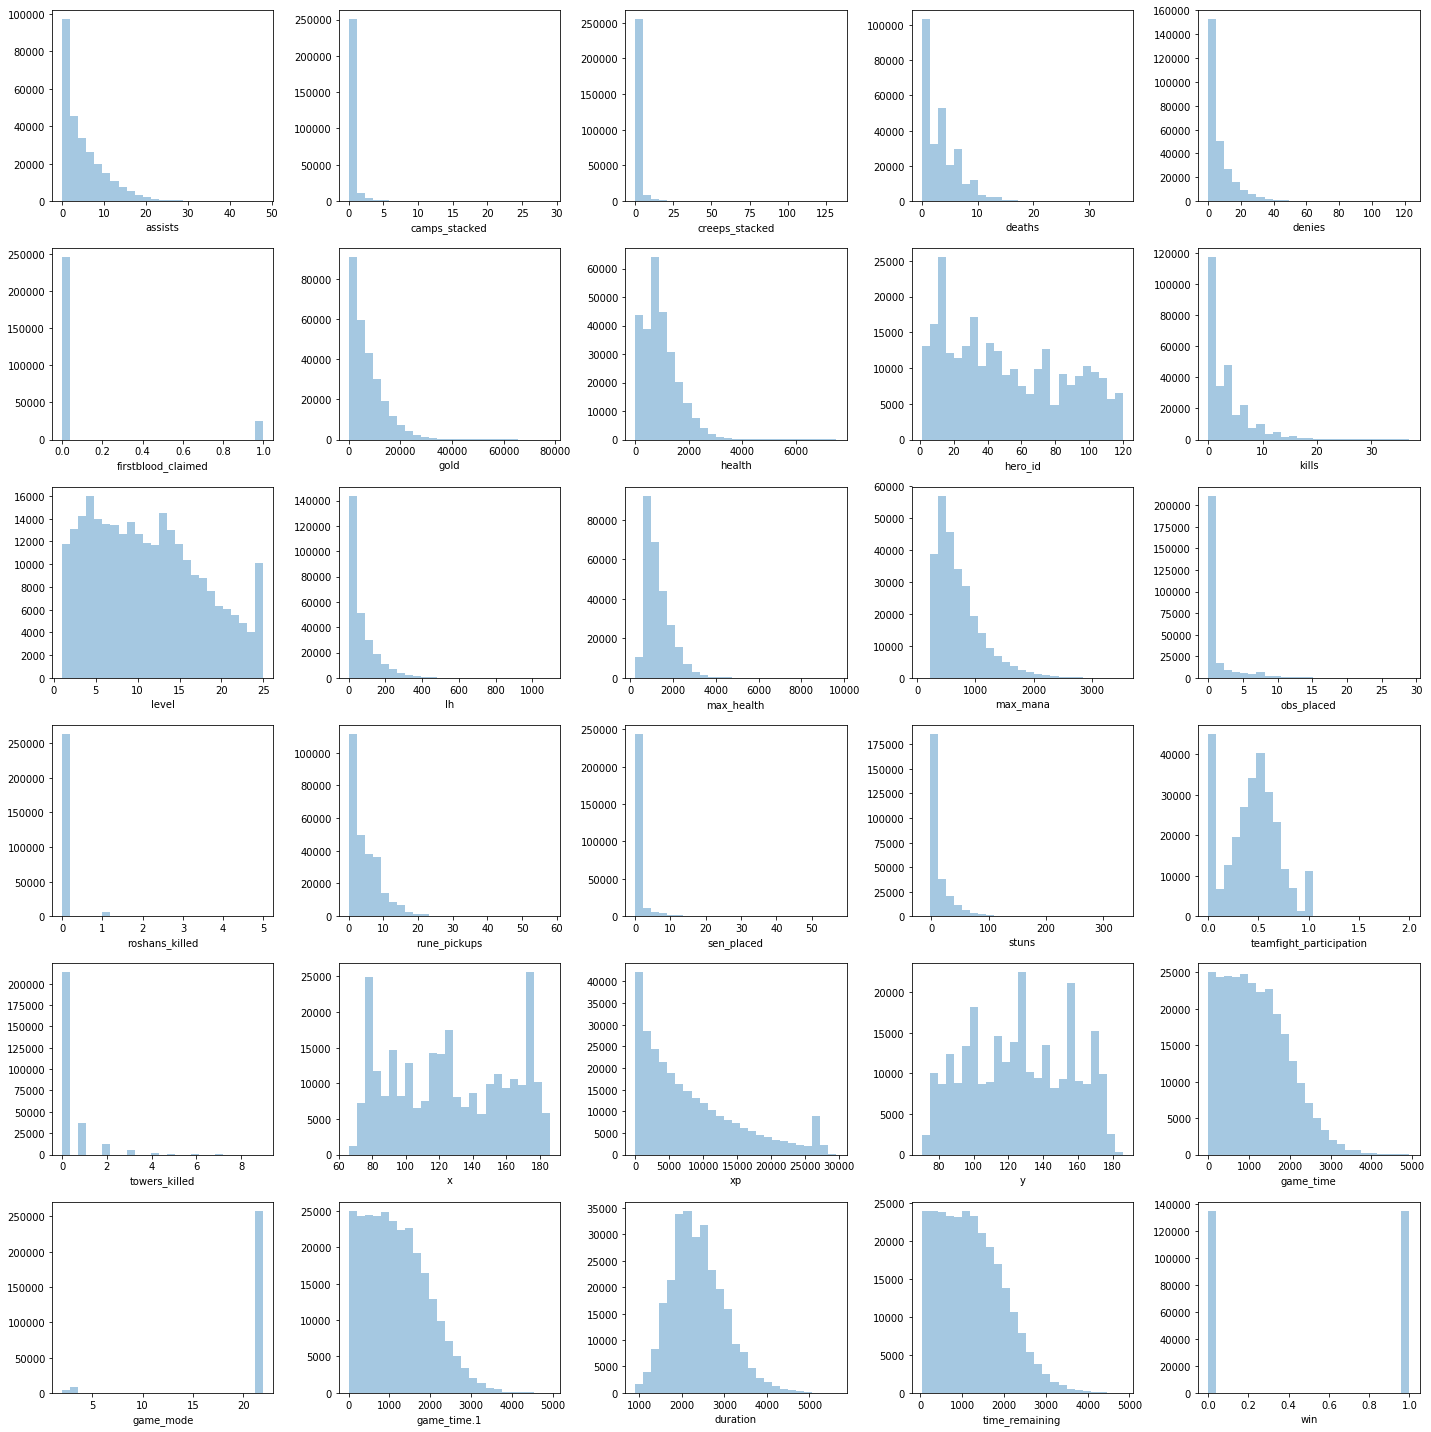

In [15]:
rows=6
cols=5
subplots=30 #inlcude 0 indexing
counter = 0 

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,20))

#remove extra blank subplots
#fig.delaxes(axes[5,4]) 


for a in np.arange(rows):
    for b in np.arange(cols):
        if ranked_df.iloc[:,counter].dtype == 'object':
            counter+=1
        sns.distplot(ranked_df.iloc[:,counter], kde=False, bins=25, ax=axes[a,b])
        counter+=1
plt.tight_layout()

As suspected from the descriptive statistics, it is visually apparent that most of the variables exhibit skew. There are a couple of interesting patterns such as level which seems to have peaks are roughly every 5 levels. XP has a small spike just shy of 30,000. Kills and Deaths have several peaks throughout the distribution. It looks like there are hardly any normally distributed variables, but many could be approximately lognormally distributted. Some of these distributions will make transformations difficult to get them to resemble a normal distribution.

Just like in the descriptive statistics some variables are very role dependent and can be skewed because only one role may contribute to the values (or lack thereof) shown. Unfortunately, it can be difficult to accurately determine which role a person is playing to accurately drill down. In another project I will try to see if unsupervised clustering can generally determine core/support roles.

Let's look at the same histogram except let's examine at the team level next.

In [16]:
#After visually inspecting game_time and game_time.1 and looking at the descriptive statistics, they are duplicated
ranked_df.drop('game_time.1' ,axis=1, inplace=True)

### Radiant vs Dire

Now that we have an idea of what the dataset looks at a whole, let's look at Radiant vs Dire individually. I'll focus on the smoothed distribution plot for non categorical variables to make visual comparison easier.

In [17]:
radiant_df = ranked_df.filter(like='radiant', axis=0)
dire_df = ranked_df.filter(like='dire', axis=0)

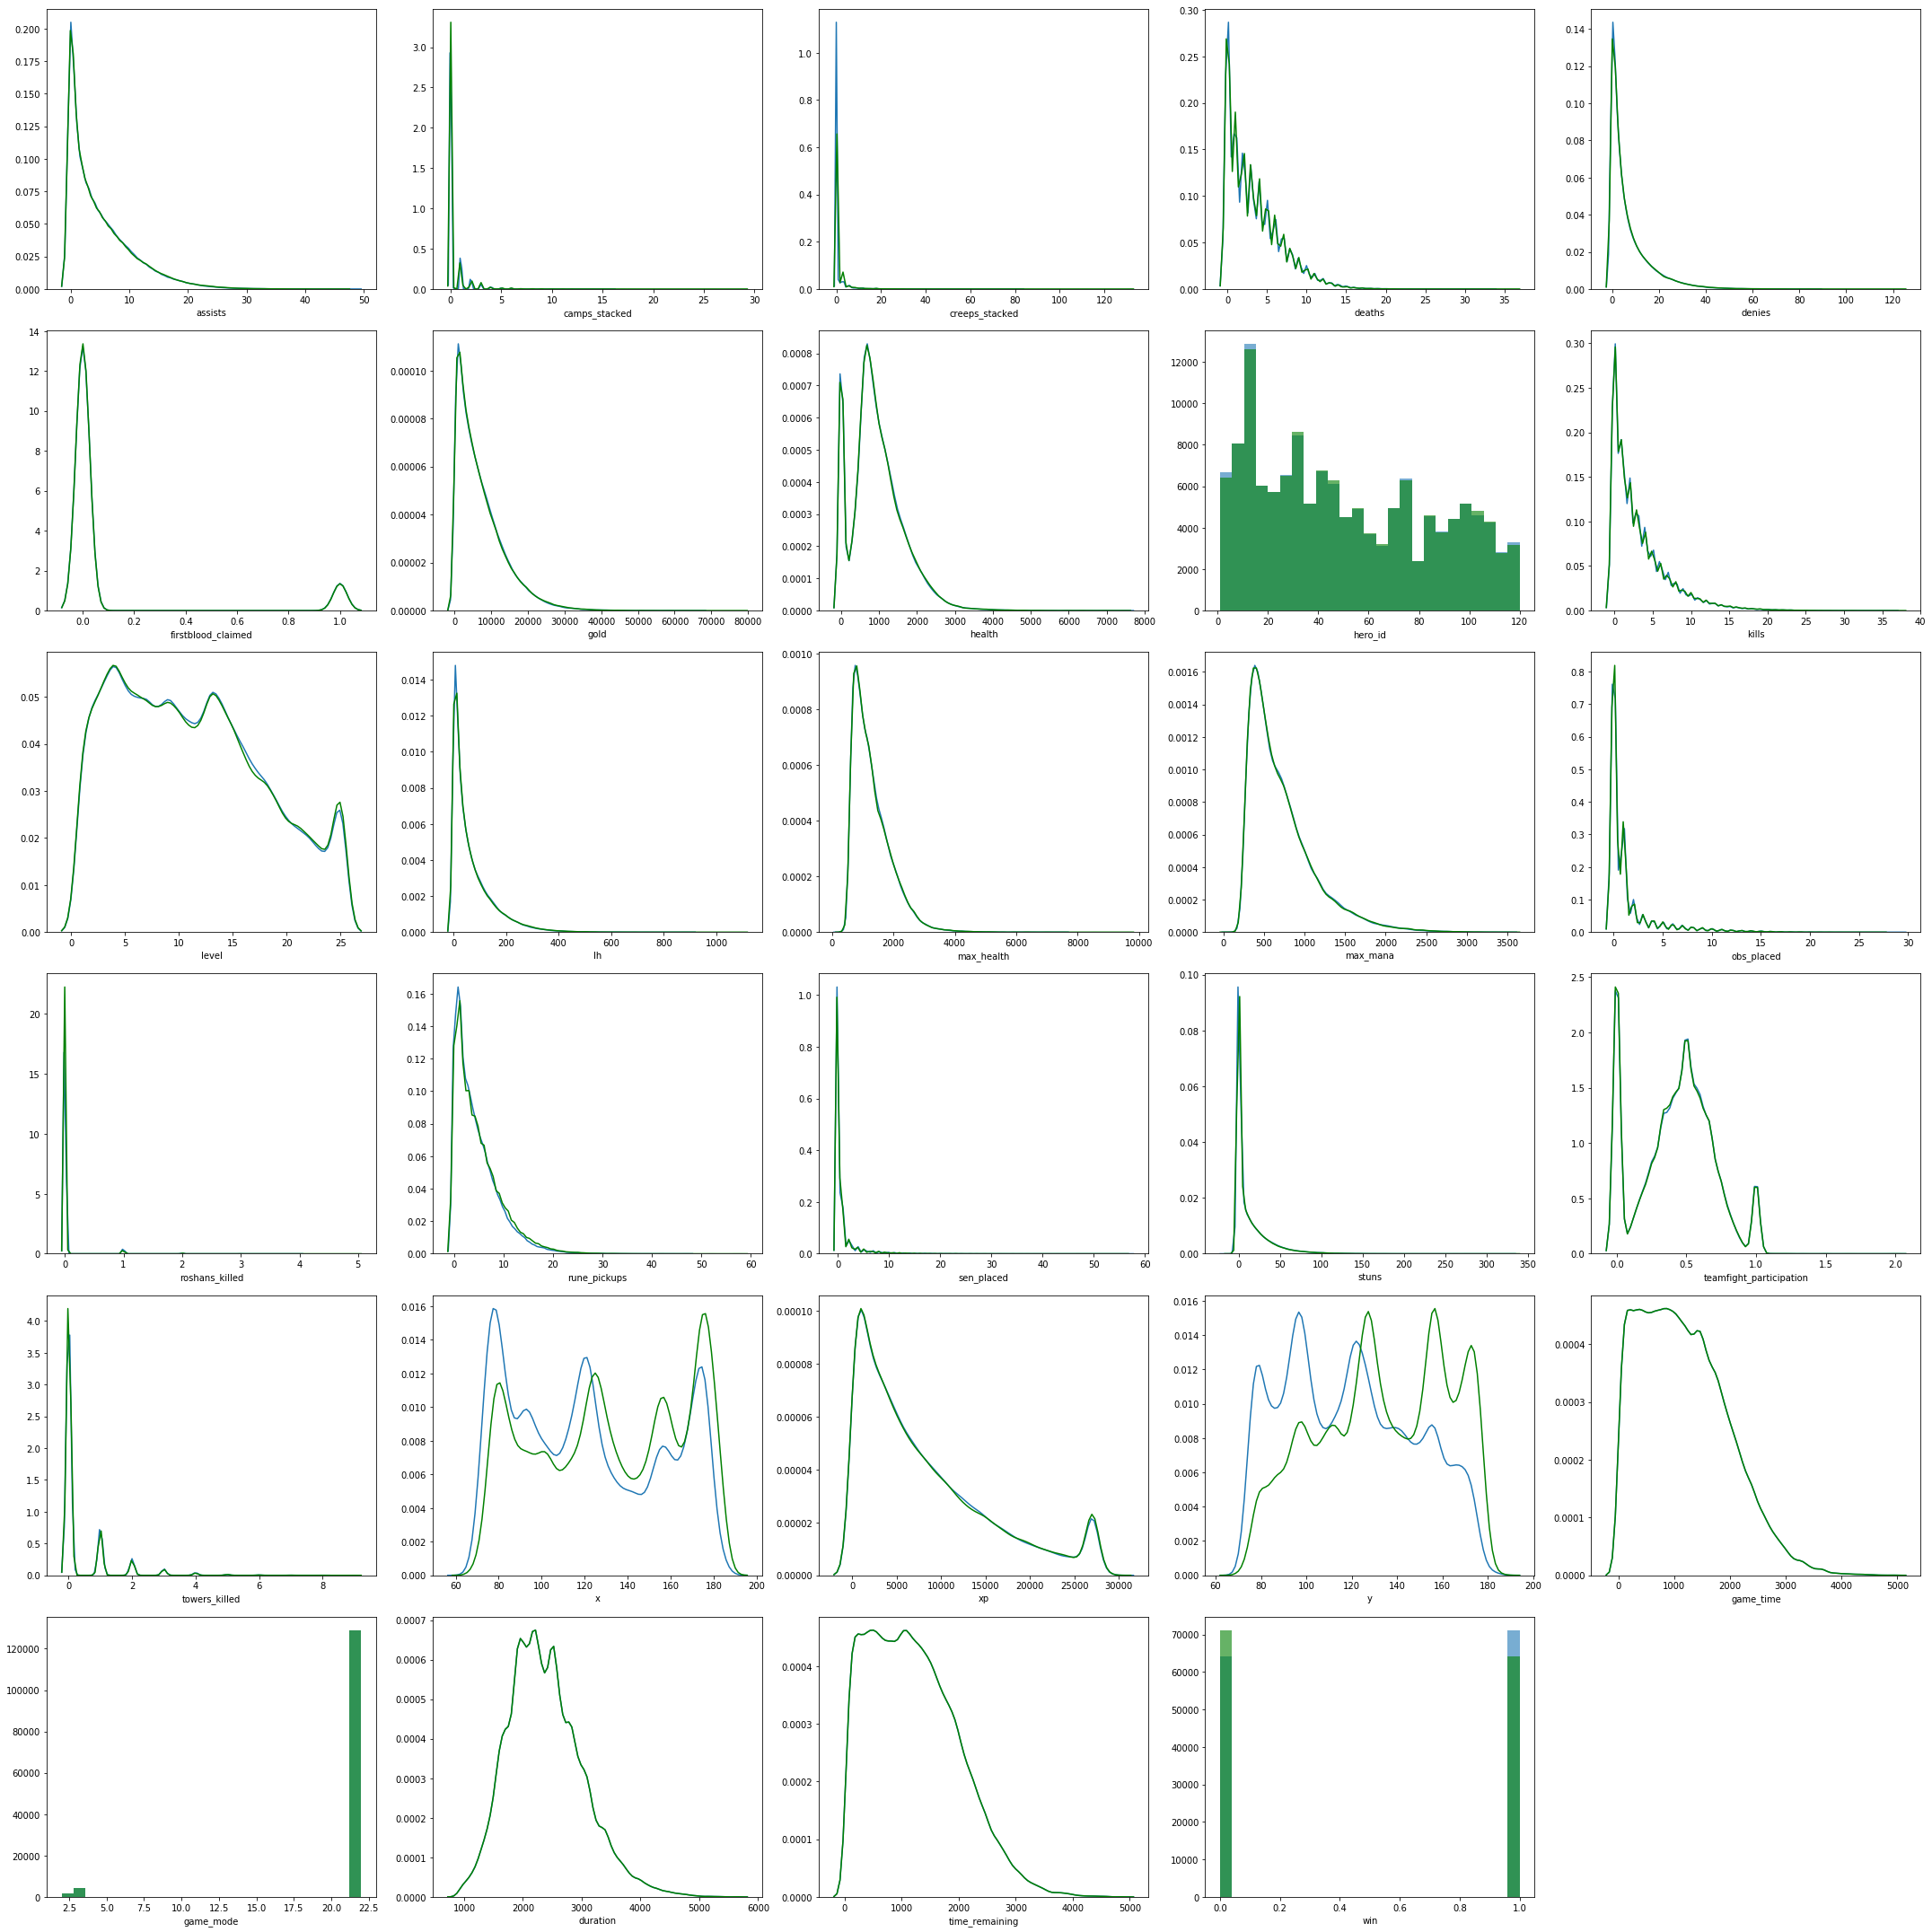

In [18]:
rows=6
cols=5
subplots=30
counter = 0 

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(30,30))
fig.delaxes(axes[5,4]) #remove extra blank subplot

for a in np.arange(rows):
    for b in np.arange(cols):
        if radiant_df.iloc[:,counter].dtype == 'object':
            counter+=1
        
        if (radiant_df.iloc[:,counter].dtype == 'int64' or radiant_df.iloc[:,counter].dtype == 'float64'):
            sns.distplot(radiant_df.iloc[:,counter], hist=False, bins=25, ax=axes[a,b])
            sns.distplot(dire_df.iloc[:,counter], hist=False, bins=25, ax=axes[a,b] ,color='green')
        else:
            sns.distplot(radiant_df.iloc[:,counter], kde=False, bins=25, ax=axes[a,b], hist_kws=dict(alpha=0.6))
            sns.distplot(dire_df.iloc[:,counter], kde=False, bins=25, ax=axes[a,b], hist_kws=dict(alpha=0.6), color='green')
        counter+=1
        if counter == (subplots):  #stop the loop when all subplots are populated
            break

plt.tight_layout()

For the most part the distributions are similar. Some more obvious differences are that radiant has a greater frequency at lower values of rune_pickups, sen_placed, and stuns. The x and y values seem to be mirrored (perhaps because the one team is going "up" the map the other is going "down"). We can see that radiant/dire differ slightly in their hero selection when looking at hero_id as well as in the distribution of deaths.

Before I join the hero names into the main dataframe I'm working out of, I'm going to check to make sure that my mapping has all the hero IDs that I need.

In [19]:
#need to decode hero names
hero_names = pd.read_csv('hero_names.csv')
print(hero_names.columns)
hero_names['hero_id'] = hero_names['hero_id'].astype('category')

Index(['name', 'hero_id', 'localized_name'], dtype='object')


In [20]:
unique_left = ranked_df['hero_id'].unique()
unique_right = hero_names['hero_id'].unique()

print('missing hero IDs')
[x for x in unique_left if x not in unique_right]

missing hero IDs


[120, 119, 114]

I'll add these missing values to my mapping

In [21]:
missing_id = pd.DataFrame([['Pangolier', 120, 'Pangolier'],
                           ['Dark Willow', 119,'Dark Willow'],
                           ['Monkey King', 114,'Monkey King']], columns=['name','hero_id','localized_name'])
hero_names = hero_names.append(missing_id, ignore_index=True)

In [22]:
#join the hero names based off of the hero ID
ranked_df = pd.merge(left=ranked_df, right=hero_names[['hero_id', 'localized_name']], how='left', on='hero_id').set_index(df_index) 

#merge does not preserve data type :-(
#ranked_df['firstblood_claimed'] = ranked_df['firstblood_claimed'].astype('category')
ranked_df['hero_id'] = ranked_df['hero_id'].astype('category')
ranked_df['game_mode'] = ranked_df['game_mode'].astype('category')
ranked_df['win'] = ranked_df['win'].astype('int64') #must be changed to int temporarily for calculations

#verifying that the merge worked as expected
#del hero_names
print("Missing Hero Names", ranked_df[ranked_df['localized_name'].isna()]['hero_id'].unique())

Missing Hero Names [], Categories (0, int64): []


Great! There's no missing hero names. Next, let's see if the Radiant of Dire team have an inherent advantage.

Radiant has a 5.260822950940877 % advantage


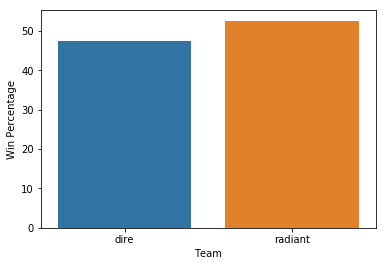

In [23]:
ranked_df.drop('hero_id', axis=1, inplace=True)

win_rates = ranked_df['win'].groupby('team').mean()*100
sns.barplot(x=win_rates.index, y=win_rates)
plt.xlabel("Team");
plt.ylabel("Win Percentage");

rad_wr = ranked_df['win'].sum()/len(ranked_df)*100
print("Radiant has a", 2*win_rates['radiant'] - 100, "% advantage")

Looks like there is a decent bias towards Radiant!  Unfortunately, you are not able to pick the side you can play as so if you are on the dire it looks like you're going to have to try a little harder.

Let's see which team does Roshan more often. Completing Roshan gives a player a second life and therefore a significant advantage when fighting. I'm going to temporarily fill in the nan values for the "next_roshan_team" column, but will collectively fix the rest of the missing values at a later time.

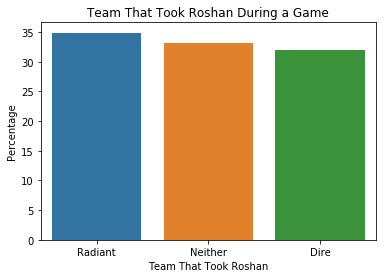

In [24]:
roshan = ranked_df['next_roshan_team'].fillna('Neither')
rosh_pct = roshan.value_counts()/len(roshan)

sns.barplot(x=rosh_pct.index, y=rosh_pct*100)
#sns.countplot(roshan)
plt.xlabel("Team That Took Roshan");
plt.ylabel("Percentage");
plt.title("Team That Took Roshan During a Game");

Interesting, Radiant took Roshan more than the Dire. I also find it surprising that the number of games where neither team took Roshan outnumbered the games where Dire took Roshan. Perhaps this could be a major driver for who wins the game?

Looking at first blood claimed which is the team that had the first kill of the match.

Radiant First Blood Advantage: 0.9938286447062594 %


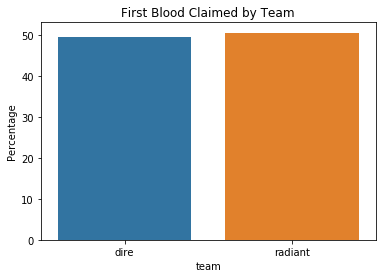

In [25]:
fb_sum = ranked_df['firstblood_claimed'].astype('int').groupby(level=1).sum()
sns.barplot(x=fb_sum.index, y=fb_sum/fb_sum.sum()*100);
plt.title('First Blood Claimed by Team');
plt.ylabel('Percentage');
print('Radiant First Blood Advantage:', (fb_sum['radiant']-fb_sum['dire'])/fb_sum.sum()*100,'%')

Looks like it's pretty even on this one. It's a 50/50 shot for one team to get the first kill in a match.

## Multivariate Feature Analysis

Usually, I would like to use a pairplot to view relationships between variables but I think it would be visually unappealing and hard to analyze due to having many features. I will opt for a correlation matrix as the interpretability should be much easier. Since the vast majority of my features are numeric I will use pearson correlation.

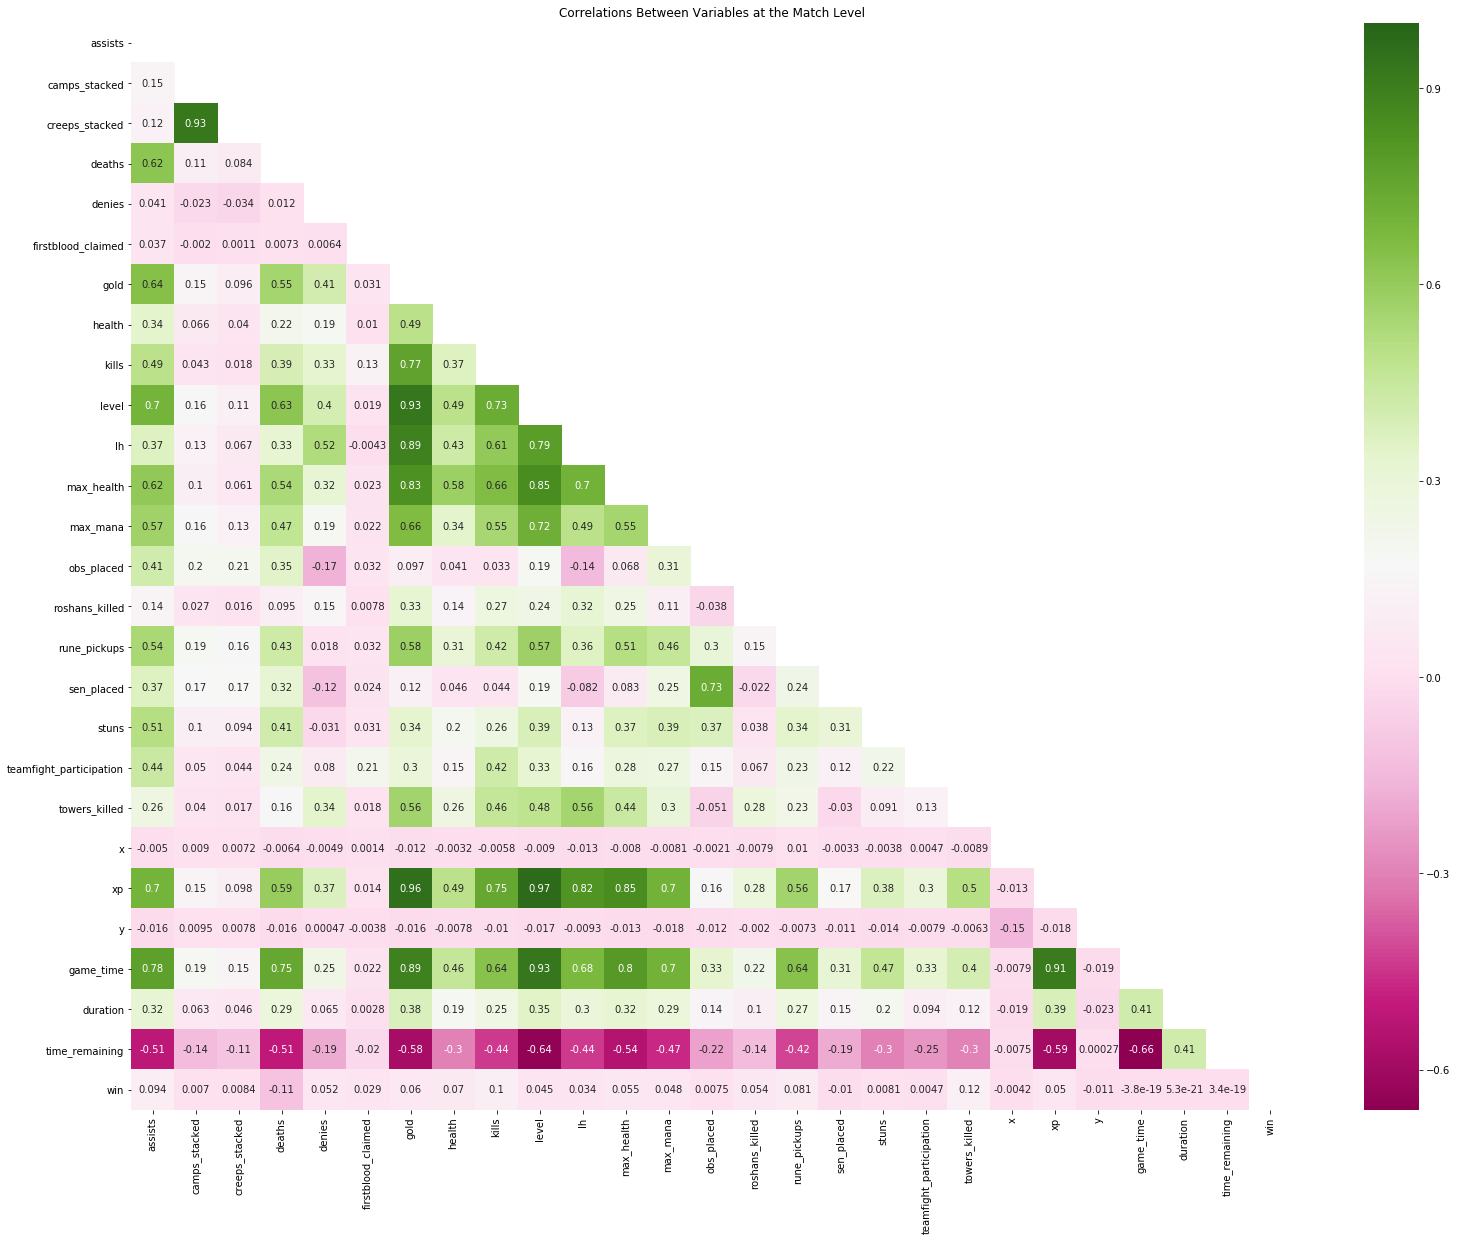

In [26]:
plt.figure(figsize=(26,20))
corr_matrix = ranked_df.corr()
corr_mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask=corr_mask, cmap='PiYG')
plt.title("Correlations Between Variables at the Match Level");

While there are some strong correlations, not all of them are particularly interesting. For example, as the game goes longer a player naturally accumulates gold. Some interesting correlations are:
- Gold is weakly correlated (0.4) with denies. A player has to get the last hit on a creep to get gold and they can deny the other team the last hit. One would think that focusing on denies would mean there is less focus on last hitting so I am a little surprised there is a weak positive correlation here.
- Deaths are positively correlated with gold. Somewhat counter intuitive but could be the result of having more deaths and more gold as the game goes on
-rune pickups and max health/max mana (~0.5)

I'm going to drop a couple of columns because they are very correlated and essentially a proxy for one another. A player's xp determines their level, and level is a more intuitive concept so I am going to drop xp. Duration is the "opposite" of time_remaining, so I am going to remove time_remaining.

In [27]:
ranked_df.drop(['time_remaining', 'xp'],axis=1, inplace=True)

Let's look of the relationships of the variables with my target variable, win.

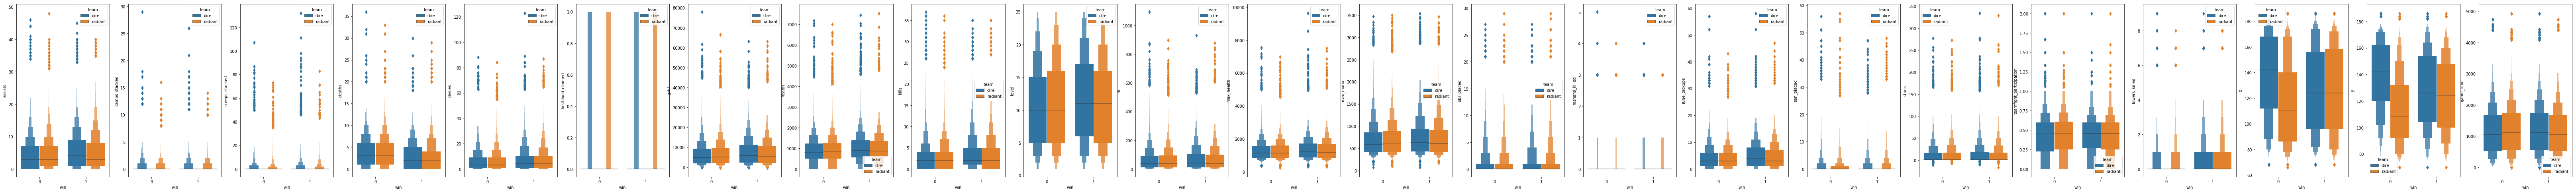

In [28]:
ranked_df2 = ranked_df.reset_index()

cols = 24
counter = 0

fig, ax = plt.subplots(1,10, figsize=(120,8))

for j in range(cols):
    if is_numeric_dtype(ranked_df.iloc[:,j].dtype)==True :
        plt.subplot(1, cols, counter+1)
        sns.boxenplot(x='win', y=ranked_df.columns[j], hue='team', data=ranked_df2)
        counter+=1 

Some takeaways:
- Dire has greater median assists than radiant when they win
- slightly greater median deaths for the losing team
- slightly higher median gold and health for the winning team
- higher median level for the winning team
- Dire has greater median rune pickups when they win


Looking at hero win rates next

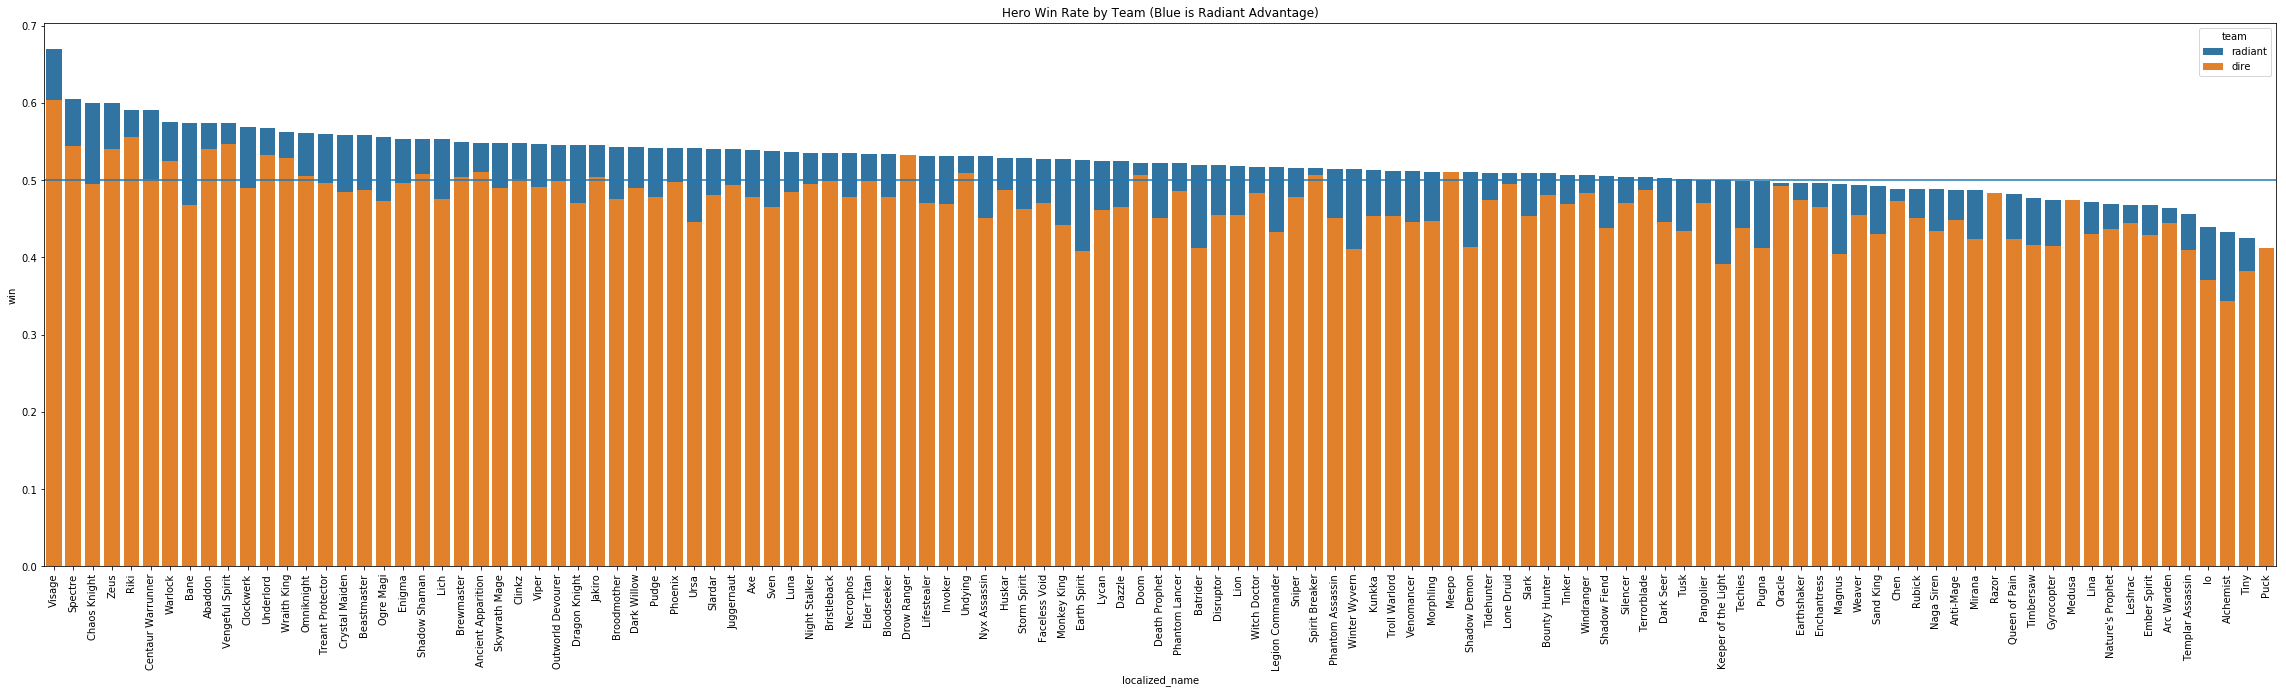

In [29]:
hero_wr_team = ranked_df2.groupby(['team','localized_name']).mean().reset_index().sort_values(ascending=False, by='win')
plt.figure(figsize=(40,10))
plt.title('Hero Win Rate by Team (Blue is Radiant Advantage)')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
barplot = sns.barplot(x='localized_name' , y='win', data=hero_wr_team, hue='team', dodge=False)
barplot.axhline(0.5)

Radiant has a clear advantage over the majority of heroes when it comes to win rate. Exceptions where the win rates are roughly equal are Drow Ranger, Shadow Demon, Oracle, Razor, Medusa, and Puck. 

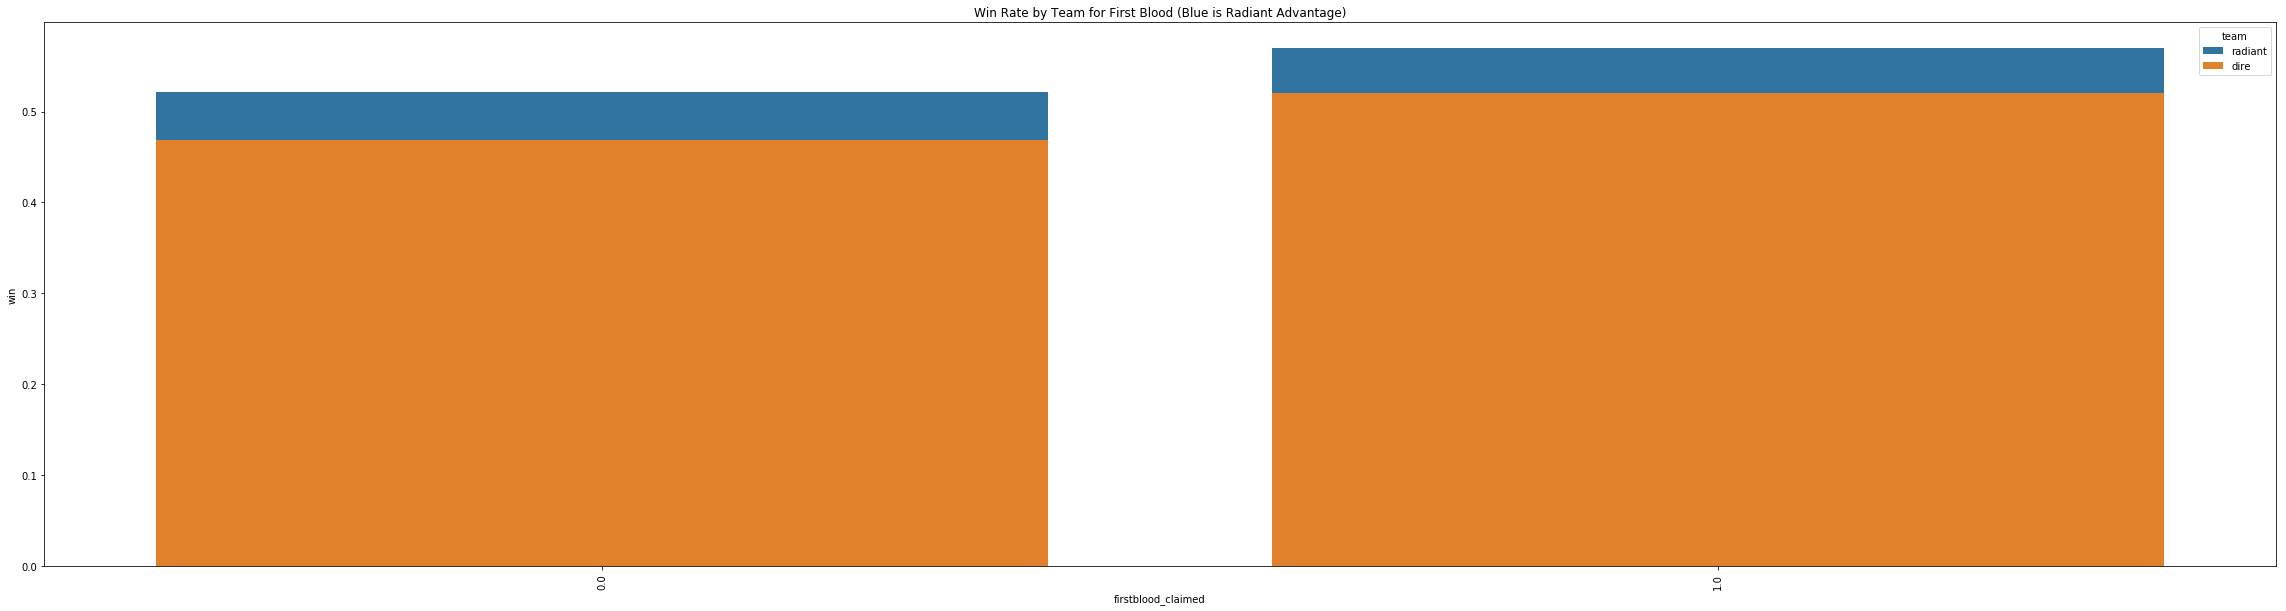

In [30]:
firstblood_wr = ranked_df2.groupby(['team', 'firstblood_claimed']).mean().reset_index().sort_values(ascending=False, by='win')
plt.figure(figsize=(40,10))
plt.title('Win Rate by Team for First Blood (Blue is Radiant Advantage)')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
sns.barplot(x='firstblood_claimed' , y='win', data=firstblood_wr, hue='team', dodge=False)
del firstblood_wr

We already saw that Radiant takes first blood more often than Dire. Now we can see that regardless of whether first blood was obtained by the Radiant, they still hold an advantage over the Dire team and that first blood gives an advantage in winning.

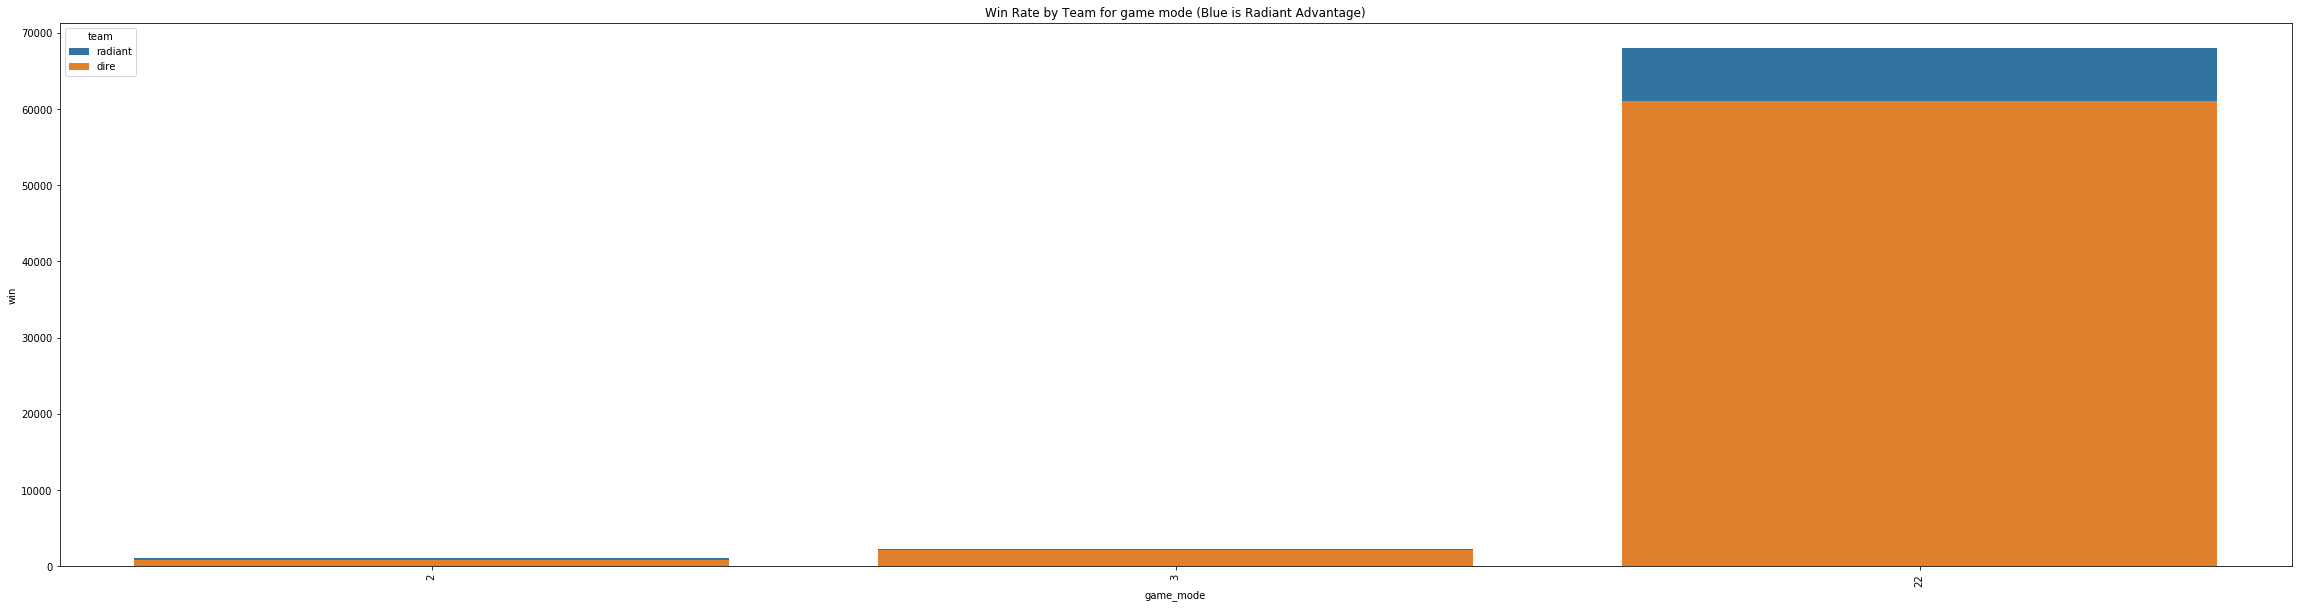

In [31]:
gamemode_wr = ranked_df2.groupby(['team', 'game_mode']).sum().reset_index().sort_values(ascending=False, by='win')
plt.figure(figsize=(40,10))
plt.title('Win Rate by Team for game mode (Blue is Radiant Advantage)')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
sns.barplot(x='game_mode' , y='win', data=gamemode_wr, hue='team', dodge=False)

While everything is ranked gameplay there are a couple different modes that can be played that mostly dictate how you choose your heroes. Here we can see that the majority of games played are all pick, where there are no restrictions in picking your hero.

### Missing Values

In [32]:
ranked_df.isna().sum()

assists                        0
camps_stacked                  0
creeps_stacked                 0
deaths                         0
denies                         0
firstblood_claimed             0
gold                           0
health                         0
kills                          0
level                          0
lh                             0
max_health                     0
max_mana                       0
obs_placed                     0
roshans_killed                 0
rune_pickups                   0
sen_placed                     0
stuns                          0
teamfight_participation        0
towers_killed                  0
x                              0
y                              0
game_time                      0
game_mode                      0
duration                       0
next_roshan_team           89680
win                            0
localized_name                 0
dtype: int64

There are only missing values in the next_roshan_team column which we saw before. The missing values here mean that neither team took Roshan.

In [33]:
ranked_df['next_roshan_team'].fillna('Neither', inplace=True)
ranked_df.isna().sum().sum()

0

### Final Data Preparation and Feature Engineering

I'm going to get the data into a form that is more intuitive for the model to learn from. The issue with the original form of the dataset is that the majority of features are on a player basis which are not defined by their true role. For example, the player 1 for radiant or dire will consist of both core and support roles as well as different lanes.

What would likely be much more predictive is looking at core roles only (i.e. having them in their own column), for example, and the ones with high last hits and kills with few deaths would be those who are much more likely to win the game. However, since I do not have this information I will be looking at everything on a comparative basis of radiant over dire for each match.

While I am interested in investigating individual player perforance, it will require some extra steps as I am lacking a couple of key features such as which position each player is playing since player 5 does not necessarily denote a true "position 5" player. Some heroes can play different positions so it can be difficult to accurately assess where each player belongs. In another project I am going to attempt to see if I can cluster or distinguish the roles. 

In [34]:
ranked_df_sum = ranked_df.groupby(['match_id_hash', 'team']).sum()

ranked_df.to_pickle('ranked_df')

#Game time, duration, and win must be divided by 5 as they are already team level
ranked_df_sum[['game_time', 'duration', 'win', 'teamfight_participation']] = ranked_df_sum[['game_time', 'duration', 'win', 'teamfight_participation']]/5

In [35]:
#restore feature dtypes
categorical_feats = ['firstblood_team', 'hero_id', 'radiant_win', 'game_mode', 'win_highwr_hero', 'localized_name', 'next_roshan_team', 'win']
for i in np.arange(ranked_df_sum.shape[1]):
    if (ranked_df_sum.columns[i] in categorical_feats):
        ranked_df_sum.iloc[:,i] = ranked_df_sum.iloc[:,i].astype('category')
    else:
        ranked_df_sum.iloc[:,i] = ranked_df_sum.iloc[:,i].astype('float')

In [36]:
X = ranked_df_sum.unstack(level=1)
X.columns = ['_'.join(col).strip() for col in X.columns.values]
y=X['win_radiant']
X.drop(['win_dire', 'win_radiant'], axis=1, inplace=True) 
X.head()

,assists_dire,assists_radiant,camps_stacked_dire,camps_stacked_radiant,creeps_stacked_dire,creeps_stacked_radiant,deaths_dire,deaths_radiant,denies_dire,denies_radiant,firstblood_claimed_dire,firstblood_claimed_radiant,gold_dire,gold_radiant,health_dire,health_radiant,kills_dire,kills_radiant,level_dire,level_radiant,lh_dire,lh_radiant,max_health_dire,max_health_radiant,max_mana_dire,max_mana_radiant,obs_placed_dire,obs_placed_radiant,roshans_killed_dire,roshans_killed_radiant,rune_pickups_dire,rune_pickups_radiant,sen_placed_dire,sen_placed_radiant,stuns_dire,stuns_radiant,teamfight_participation_dire,teamfight_participation_radiant,towers_killed_dire,towers_killed_radiant,x_dire,x_radiant,y_dire,y_radiant,game_time_dire,game_time_radiant,duration_dire,duration_radiant
match_id_hash,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000c270e25494c03d5c81036463fc45,11.0,33.0,9.0,0.0,33.0,0.0,17.0,8.0,61.0,26.0,0.0,1.0,36412.0,36686.0,5764.0,4331.0,8.0,17.0,61.0,62.0,389.0,294.0,6515.0,6310.0,3511.69086,4738.69203,7.0,9.0,0.0,0.0,24.0,29.0,5.0,6.0,46.755151,224.047723,0.475000,0.588235,1.0,4.0,788.0,724.0,770.0,688.0,1304.0,1304.0,1893.0,1893.0
0000cbef31e13f297dbbe47d84a08169,20.0,29.0,2.0,5.0,6.0,12.0,17.0,13.0,80.0,38.0,0.0,1.0,28418.0,26566.0,5400.0,4261.0,13.0,15.0,52.0,53.0,296.0,257.0,5860.0,5520.0,3026.69036,3418.69076,7.0,5.0,0.0,0.0,25.0,19.0,4.0,3.0,16.096161,53.820924,0.507692,0.550000,1.0,0.0,654.0,526.0,618.0,540.0,1056.0,1056.0,2137.0,2137.0
000432b654aee6e8792ce17bb19ccf16,3.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,8.0,2.0,1.0,0.0,4017.0,3909.0,2617.0,3325.0,3.0,2.0,14.0,12.0,28.0,26.0,3380.0,3400.0,1550.68899,1574.68898,2.0,2.0,0.0,0.0,3.0,5.0,0.0,2.0,1.566272,8.131323,0.400000,0.333333,0.0,0.0,740.0,618.0,652.0,596.0,170.0,170.0,1889.0,1889.0
000a9891b8b7712e9a19e032b583023e,26.0,11.0,0.0,1.0,0.0,3.0,10.0,21.0,41.0,42.0,0.0,1.0,37188.0,27650.0,6313.0,5480.0,19.0,9.0,62.0,50.0,374.0,314.0,7270.0,5480.0,4624.69193,3072.69046,8.0,8.0,0.0,0.0,31.0,14.0,11.0,3.0,28.342771,31.525739,0.428571,0.444444,2.0,2.0,608.0,442.0,604.0,510.0,1142.0,1142.0,1728.0,1728.0
000f6a90d850a43393649af550572f48,16.0,35.0,2.0,4.0,2.0,5.0,33.0,15.0,76.0,53.0,0.0,1.0,33438.0,52364.0,3934.0,7849.0,12.0,33.0,59.0,81.0,324.0,572.0,6670.0,8895.0,3312.69061,4053.69133,9.0,11.0,0.0,0.0,26.0,27.0,8.0,7.0,69.667195,68.949880,0.466667,0.412121,0.0,3.0,782.0,758.0,776.0,758.0,1449.0,1449.0,1631.0,1631.0


In [37]:
dire_cols = X.columns.str[-3:] == 'ire' #get dire columns
radiant_cols = X.columns.str[-3:] == 'ant' #get radiant columns

X_dire = X[X.columns[dire_cols]]
X_radiant = X[X.columns[radiant_cols]]

I have to restore some of the features that were not dependent upon being radiant/dire.

In [38]:
#get the overall win rates for the heroes
heroes_wr = ranked_df2.groupby(['localized_name']).mean()['win']
ranked_df = ranked_df.merge(heroes_wr, on='localized_name', suffixes=['','_heroes'], how='left').set_index(ranked_df.index)
hero_wr_team = ranked_df.groupby(['match_id_hash', 'team']).mean()['win_heroes'].reset_index()

#segment the radiant and dire matches to join on the previous radiant/dire dataframes
dire_herowr = hero_wr_team[hero_wr_team['team']=='dire']
radiant_herowr = hero_wr_team[hero_wr_team['team']=='radiant']

#restore match id as index for join
dire_herowr.set_index('match_id_hash', inplace=True)
radiant_herowr.set_index('match_id_hash', inplace=True)

#merge average of hero win rates on to main dataframe
X_dire = X_dire.merge(dire_herowr['win_heroes'], on='match_id_hash', how='left', suffixes=['','_right'])
X_radiant = X_radiant.merge(radiant_herowr['win_heroes'], on='match_id_hash', how='left', suffixes=['','_right'])

#rename column for consistency
X_radiant.rename(columns={'win_heroes':'win_heroes_radiant'}, inplace=True)

#variables in terms of radiant advantage
X = X_radiant - X_dire.values 


In [39]:
#remove positional data and empty columns
X.drop(['x_radiant', 'y_radiant', 'game_time_radiant', 'duration_radiant'], axis=1, inplace=True) 
join_df = ranked_df_sum.reset_index(level=1)
join_df = join_df[~join_df.index.duplicated(keep='last')][['duration']]

#remove radiant from colnames
X.columns = X.columns.str[:-8]

#restore the game_time and duration to the feature dataframe
X = X.join(join_df, how='left', on='match_id_hash') 

In [40]:
X.to_pickle('X_df')

Wrapping up feature engineering and creating new features

In [41]:

X['kda_ratio'] = (X['kills']+X['assists'])/np.fmax(1, X['deaths'])


#Interaction of kills/gold/deaths with the time the data was pulled
X['gold_time'] = X['gold']*X['duration']
X['kills_time'] = X['kills']/X['duration']
X['deaths_time'] = X['deaths']/X['duration']
X['kda_ratio_time'] = X['kda_ratio']/X['duration']
X['roshans_killed_time'] = X['roshans_killed']/X['duration']
X['towers_killed_time'] = X['towers_killed']/X['duration']
X['lh_time'] = X['lh']/X['duration']

#squaring features
X['kills_sq'] = X['kills']**2
X['deaths_sq'] = X['deaths']**2
X['lh_sq'] = X['lh']**2
X['kda_ratio_sq'] = X['kda_ratio']**2

#squaring and duration
X['kills_sq_time'] = X['kills']**2/X['duration']
X['deaths_sq_time'] = X['deaths']**2/X['duration']
X['lh_sq_time'] = X['lh']**2/X['duration']
X['kda_ratio_sq_time'] = X['kda_ratio']**2/X['duration']

#duration is same for both teams and therefore has no predictive power itself
X.drop(['duration'], axis=1, inplace=True)


As seen in our exploratory data analysis, the win rates for each hero can vary widely. I want to create a feature that accounts for the general draft of the team and whether the average of the win rates of the heroes are above or below average.

In [42]:
X['firstblood_claimed'] = X['firstblood_claimed'].astype('category')

X = pd.get_dummies(X, drop_first=True).reset_index(drop=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

BoxCox does not work on negative data. To solve this I'm going to add the absolute value of the minimum value if it is less than 0. In a separate step I will use the boxcox1p to make sure all my data is positive by shifting it by 1 since the power transform can error out as $ln(0)$ is undefined.

In [43]:
#built in power transform does not skip categorical columns
#I will export this to a script since I use this transform often

class boxcox1p_transform:
    def __init__(self):
        from pandas.api.types import is_numeric_dtype
        import scipy.stats as ss
        from scipy.special import boxcox1p

        self.skews = []
        self.normmax_param = []
        self.columns = []
    
    def positive_data(self, df):
        non_neg_df = df   
            
        for i in np.arange(df.shape[1]):
            if is_numeric_dtype(df.iloc[:,i]) and np.min(df.iloc[:,i])<0:
                non_neg_df.iloc[:,i] = df.iloc[:,i] - np.min(df.iloc[:,i])
               
        return (non_neg_df)
    
    def fit(self, df):
    
        for i in np.arange(df.shape[1]):
            if is_numeric_dtype(df.iloc[:,i]) == False:
                print('Skip Warning:', df.columns[i], 'is categorical--cannot obtain parameters')
                continue
            else:
                normmax = ss.boxcox_normmax(df.iloc[:,i]+1)
                self.normmax_param.append(normmax)
                self.skews.append(boxcox1p(df.iloc[:,i], normmax).skew())

    def transform(self, df):
        
        transformed_df = df
        
        for i in np.arange(df.shape[1]):
            if is_numeric_dtype(df.iloc[:,i]) == False:
                print('Skip Warning:', df.columns[i], 'is categorical--cannot transform')
                continue
            else:
                transformed_df.iloc[:,i] = boxcox1p(df.iloc[:,i], self.normmax_param[i])
                
        return transformed_df
    
    def fit_transform(self, df):
        self.fit(df)
        transformed_df = self.transform(df)
        
        return transformed_df

Normalizing the data using the Box-Cox power transform and scaling the data. Initially I attempted to use the MinMaxScaler as to not mute the effects of my outliers, however the training/testing metrics were extremely poor. I settled on using the RobustScaler so that I would dampen the effects of my outliers on scaling the data.

In [44]:
transformer = boxcox1p_transform()
X_train = transformer.positive_data(X_train)
X_train = transformer.fit_transform(X_train)

In [45]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = transformer.positive_data(X_test)
X_test_scaled = transformer.transform(X_test_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

### Model Building

In [46]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=17)
rfc.fit(X_train_scaled, y_train)
rfc_cvs = cross_val_score(rfc, X_train_scaled, y_train, cv=5)

print('cross-val-scores:', rfc_cvs)
print('average cross-val-score', np.mean(rfc_cvs))


rfc_preds = rfc.predict(X_test_scaled)
print('test accuracy:', accuracy_score(rfc_preds,y_test))

cross-val-scores: [0.73509118 0.73527237 0.73403993 0.73527237 0.73182154]
average cross-val-score 0.7342994778812957
test accuracy: 0.7294100251367737


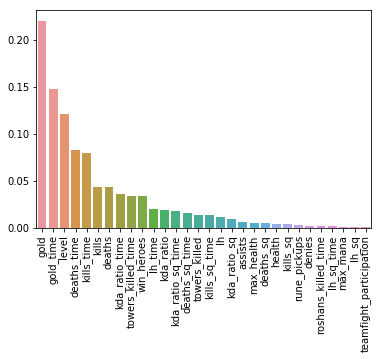

In [47]:
importances_rfc = pd.Series(data=rfc.feature_importances_,
                        index= X.columns)
importances_rfc = importances_rfc.sort_values(ascending=False)[:30]
sns.barplot(x=importances_rfc.index, y=importances_rfc)
plt.xticks(rotation=90)
plt.show()

Before adding in the cross_val_score I looked at the accuracies to get a general idea how the model performed. SVM did not perform well and takes a long time to train, so I did not include the cross val scores since this would not be my final algorithm choice.

In [48]:
svc = SVC(gamma = 0.0005)
svc.fit(X_train_scaled, y_train)
preds = svc.predict(X_train_scaled)
print(accuracy_score(preds, y_train))
    
preds_test = svc.predict(X_test_scaled)
print(accuracy_score(preds_test, y_test))

0.7457359755496401
0.718615998817093


In [49]:
lgb = LGBMClassifier(max_depth=3)
lgb.fit(X_train_scaled, y_train)
lgb_cvs = cross_val_score(lgb, X_train_scaled, y_train, cv=5)

print('cross-val-scores:', lgb_cvs)
print('average cross-val-score:', np.mean(lgb_cvs))


lgb_preds = lgb.predict(X_test_scaled)
print('test accuracy:', accuracy_score(lgb_preds,y_test))

cross-val-scores: [0.74470182 0.74735026 0.75203352 0.7525265  0.75400542]
average cross-val-score: 0.750123504963098
test accuracy: 0.7305929321307112


In [50]:
xgbc = XGBClassifier(n_estimators=100, max_depth=2)
xgbc.fit(X_train_scaled, y_train)
xgbc_cvs = cross_val_score(xgbc, X_train_scaled, y_train, cv=5)

print('cross-val-scores:', xgbc_cvs)
print('average cross-val-score:', np.mean(xgbc_cvs))

xgbc_preds = xgbc.predict(X_test_scaled)
print('test accuracy:', accuracy_score(xgbc_preds,y_test))

cross-val-scores: [0.74519468 0.74340646 0.74907567 0.74882918 0.74735026]
average cross-val-score: 0.7467712499542923
test accuracy: 0.7300014786337424


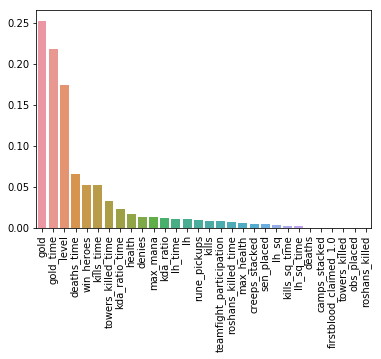

In [51]:
importances_xgbc = pd.Series(data=xgbc.feature_importances_,
                        index= X.columns)
importances_xgbc = importances_xgbc.sort_values(ascending=False)[:30]
sns.barplot(x=importances_xgbc.index, y=importances_xgbc)
plt.xticks(rotation=90)
plt.show()

In [52]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
logreg_cvs = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
print('cross-val-scores:', logreg_cvs)
print('average cross-val-score', np.mean(logreg_cvs))

logreg_preds = logreg.predict(X_test_scaled)
print('test accuracy:', accuracy_score(logreg_preds,y_test))

cross-val-scores: [0.75480532 0.74611782 0.75548435 0.75375894 0.74735026]
average cross-val-score 0.7515033371790574
test accuracy: 0.7295578885110158


In [53]:
ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)

ada_cvs = cross_val_score(ada, X_train_scaled, y_train, cv=5)
print('cross-val-scores:', ada_cvs)
print('average cross-val-score', np.mean(ada_cvs))

ada_preds = ada.predict(X_test_scaled)
print('test accuracy:', accuracy_score(ada_preds,y_test))

cross-val-scores: [0.73681617 0.73477939 0.74537836 0.74044861 0.73896968]
average cross-val-score 0.7392784414017451
test accuracy: 0.6847552861156292


#### Model Comparison

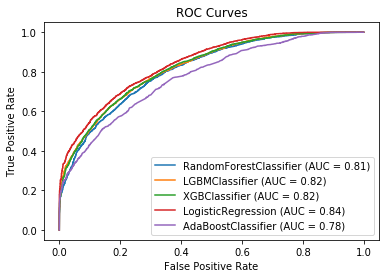

In [54]:
rfc_roc = plot_roc_curve(rfc, X_test_scaled, y_test)
lgb_roc = plot_roc_curve(lgb, X_test_scaled, y_test, ax=rfc_roc.ax_)
xgbc_roc = plot_roc_curve(xgbc, X_test_scaled, y_test, ax=rfc_roc.ax_)
logreg_roc = plot_roc_curve(logreg, X_test_scaled, y_test, ax=rfc_roc.ax_)
ada_roc = plot_roc_curve(ada, X_test_scaled, y_test, ax=rfc_roc.ax_)

plt.title('ROC Curves')
plt.show()

Looking at the ROC curves, we can see that many of the algorithms perform quite similarly. It is important to note that while the logistic regression did not produce the best accuracy, it did produce the best AUC. However, since our classes are perfectly balanced (that is half of the data set is wins, the other half is losses) I would prefer to go with accuracy here as a metric to comparer the models.

### Model Tuning

Here I am going to do some hyperparameter tuning to try to get the best model generalization and reduce overfitting. While I was able to manually tune the models a little bit and there is very little overfitting, I should be able to get better results searching for the best hyperparameters using a grid search. By looking at the ROC curves above, you can see that many of the models had similar performance. I am going to tune the XGB, light GBM and the random forest model. I chose these models as the first two are the top performing, and I am curious what improvements I can get from a non boosted model.

In [55]:
params_rfc = {
                'max_depth': [5, 10, 30, 50, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [100, 200, 500, 1000, 1500, 2000]}

grid_rfc = RandomizedSearchCV(estimator=rfc,
                       param_distributions=params_rfc, 
                       cv=5,
                        error_score='accuracy_score',
                        verbose=1,
                       n_jobs=-1,
                        random_state=42
                          )

grid_rfc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.3min finished


RandomizedSearchCV(cv=5, error_score='accuracy_score',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
     

In [56]:
rfc_hyperparams = grid_rfc.best_params_
print('Best hyperparameters:\n', rfc_hyperparams)

best_rfc = grid_rfc.best_estimator_
rfc_preds = best_rfc.predict(X_test_scaled)
print('accuracy:' , accuracy_score(rfc_preds, y_test))
print('AUC:', roc_auc_score(rfc_preds, y_test))

Best hyperparameters:
 {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
accuracy: 0.7325151559958598
AUC: 0.7336591149306537


Looks like we were able to get just a little better accuracy with tuning. Lets try the other algorithms.

In [57]:
params_lgb ={
        'max_depth' : [2, 5, 10, 50],
        'num_leaves': [5,10,25,50,100],
         'min_child_samples': [100,250,500,1000], 
         'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2],
         'subsample': [0.2, 0.4, 0.6, 0.8], 
         'colsample_bytree': [0.2, 0.4, 0.6, 0.8],
         'reg_alpha': [0, 1e-1, 1, 2, 5, 10],
         'reg_lambda': [0, 1e-1, 1, 5, 10, 100]
    }

grid_lgb = RandomizedSearchCV(estimator=lgb,
                       param_distributions=params_lgb, 
                       cv=5,
                        error_score='accuracy_score',
                        verbose=1,
                       n_jobs=-1,
                        n_iter = 500,
                        random_state=42
                          )

grid_lgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score='accuracy_score',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=3,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lam...
                   param_distributions={'colsample_bytree': [0.2, 0.4, 0.6,
                                                  

In [58]:
lgb_hyperparams = grid_lgb.best_params_
print('Best hyperparameters:\n', lgb_hyperparams)

best_lgb = grid_lgb.best_estimator_
lgb_preds = best_lgb.predict(X_test_scaled)
print('accuracy:' , accuracy_score(lgb_preds, y_test))
print('AUC:', roc_auc_score(lgb_preds, y_test))

Best hyperparameters:
 {'subsample': 0.2, 'reg_lambda': 5, 'reg_alpha': 10, 'num_leaves': 50, 'min_child_weight': 0.1, 'min_child_samples': 250, 'max_depth': 50, 'colsample_bytree': 0.8}
accuracy: 0.7322194292473754
AUC: 0.7321817399765898


In [59]:
params_xgbc ={
                "learning_rate"    : [0.05, 0.10, 0.20, 0.30 ] ,
                "n_estimators"     : [50, 100, 500, 1000],
                 "max_depth"        : [ 2, 3, 5, 10],
                 "min_child_weight" : [ 1, 3, 5, 7],
                 "gamma"            : [ 0.0, 0.1, 0.2 , 0.5 , 0.8],
                 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.8 ] 
                }

grid_xgbc = RandomizedSearchCV(estimator=xgbc,
                       param_distributions=params_xgbc, 
                       cv=5,
                        error_score='accuracy_score',
                        verbose=1,
                       n_jobs=5,
                        n_iter = 25,
                        random_state=42
                          )

grid_xgbc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
C:\Users\JT\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, error_score='accuracy_score',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=2, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           re...
                                           verbosity=1),
                   iid='deprecated', n_iter=25, n_jobs=5,
                   param_distributions={'colsample_bytree': [0.

In [60]:
xgbc_hyperparams = grid_xgbc.best_params_
print('Best hyperparameters:\n', xgbc_hyperparams)

best_xgbc = grid_xgbc.best_estimator_
xgbc_preds = best_xgbc.predict(X_test_scaled)
print('accuracy:' , accuracy_score(xgbc_preds, y_test))
print('AUC:', roc_auc_score(xgbc_preds, y_test))

Best hyperparameters:
 {'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.5}
accuracy: 0.7301493420079846
AUC: 0.7296891758051495


Surprisingly after trying a couple rounds of tuning, XGBoost actually performed worse after performing a grid search. The minor manual tuning I did for overfitting performed better, so I would use that one instead. Overall, though, random forest just barely came out ahead. All of the algorithms are comparable.

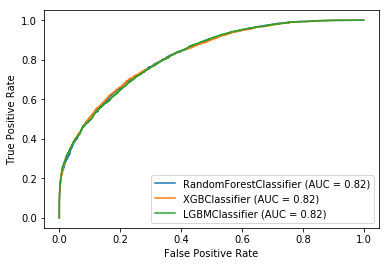

In [61]:
best_rfc_roc = plot_roc_curve(best_rfc, X_test_scaled, y_test)
best_xgb_roc = plot_roc_curve(xgbc, X_test_scaled, y_test, ax=best_rfc_roc.ax_)
best_lgb_roc = plot_roc_curve(best_lgb, X_test_scaled, y_test, ax=best_rfc_roc.ax_)

plt.show()

Looking at the feature importances of our final models.

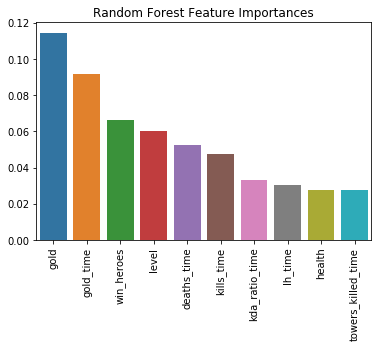

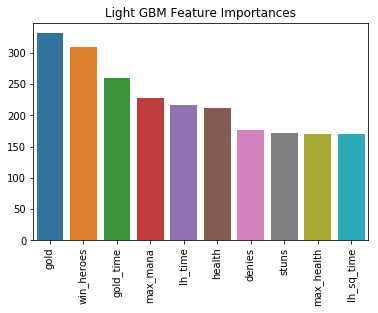

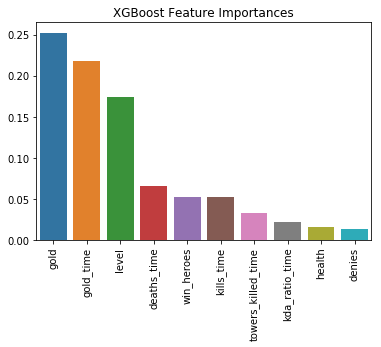

In [62]:
#random forest feature importance
importances_rfc = pd.Series(data=best_rfc.feature_importances_,
                        index= X.columns)
importances_rfc = importances_rfc.sort_values(ascending=False)[:10]
sns.barplot(x=importances_rfc.index, y=importances_rfc)
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=90)
plt.show()

#light gbm importances
importances_lgb = pd.Series(data=best_lgb.feature_importances_,
                        index= X.columns)
importances_lgb = importances_lgb.sort_values(ascending=False)[:10]
sns.barplot(x=importances_lgb.index, y=importances_lgb)
plt.title('Light GBM Feature Importances')
plt.xticks(rotation=90)
plt.show()

#XGBoost importances
importances_xgbc = pd.Series(data=xgbc.feature_importances_,
                        index= X.columns)
importances_xgbc = importances_xgbc.sort_values(ascending=False)[:10]
sns.barplot(x=importances_xgbc.index, y=importances_xgbc)
plt.title('XGBoost Feature Importances')
plt.xticks(rotation=90)
plt.show()

### Conclusions

From the graphs above, we can see that the difference in gold (i.e. net worth) or gold's interaction with time is the greatest predictor of who will win a dota match. While there is a slight difference in the ordering of feature importances among the model, the general draft of the team also plays a big impact. Other notable predictive features picked up by the models are levels, kills, and deaths.

I believe the models could be improved if we were given more information about the players such as hero damage and damage taken as well as what items were built by each team. Additioanlly, I think that if we were able to segment the dataset in a way such that the true roles of each player was known we could incorporate some additional features that could potentially improve accuracies. For example, if we look at two players playing the middle lane and one is a counter of the other, we could potentially predict the outcome of a match with better accuracy.


### Taking it a Step Further

While I was able to improve the accuracy of the models by several percent with feature engineering, they still fall short of where I hoped for them to be. Despite this I want to answer the "so what?" of why you would build this model. While there could be several applications I would like to create a "product" where these models could be used on the fly to predict the winner of a match for say esports betting purposes. 

I also want to incorporate more features into the app like a hero pick suggester. While I will rely on the inferences and models I made in this project I am going to look at a few more things from other sources as well. I'm going to utilize more data from a Dota2 website and their API and incorporate my models into a usable win predictor given some inputs.

Please see my other notebook for the continuation of this project.